In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [10]:
url = "https://www.worldometers.info/coronavirus/"

In [11]:
response = requests.get(url)
print(response)

<Response [200]>


In [12]:
soup=BeautifulSoup(response.content, "html.parser")

In [13]:
soup.title

<title>Coronavirus Update (Live): 3,002,887 Cases and 207,080 Deaths from COVID-19 Virus Pandemic - Worldometer</title>

In [14]:
divs=soup.find("div", class_="panel_flip")
for i in divs.find_all("div", class_="panel_front"):
    print(i.text)


1,913,325
Currently Infected Patients


1,855,721 (97%)
in Mild Condition

57,604 (3%)
Serious or Critical


Show Graph



In [15]:
coronatable=soup.find_all("table")

In [23]:
coronatable

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;">
 <thead>
 <tr>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br>Cases</br></th>
 <th width="30">Total<br>Deaths</br></th>
 <th width="30">New<br>Deaths</br></th>
 <th width="30">Total<br>Recovered</br></th>
 <th width="30">Active<br>Cases</br></th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th style="display:none" width="30">Continent</th>
 </tr>
 </thead>
 <tbody>
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>998,393</td>
 <td>+2,056</td>
 <td>56,389</td>
 <td>+194</td>
 <td>135,476</

In [16]:
len(coronatable)

2

In [17]:
co=coronatable[0]

In [18]:
country = []
total_cases = []
new_cases=[]
total_death=[]
new_Death = []
Total_Recovered = []
rows = co.find_all("tr")[9:-8]
for row in rows:
    col = row.find_all("td")
    country.append(col[0].text.strip())
    total_cases.append(col[1].text.strip())
    new_cases.append(col[2].text.strip())
    total_death.append(col[3].text.strip())
    new_Death.append(col[4].text.strip())
    Total_Recovered.append(col[5].text.strip())
    
    
    
print(country)
print(total_cases)
print(new_cases)
print(total_death)
print(new_Death)
print(Total_Recovered)

['USA', 'Spain', 'Italy', 'France', 'Germany', 'UK', 'Turkey', 'Iran', 'Russia', 'Brazil', 'Canada', 'Belgium', 'Netherlands', 'Switzerland', 'India', 'Peru', 'Portugal', 'Ecuador', 'Ireland', 'Sweden', 'Saudi Arabia', 'Israel', 'Austria', 'Mexico', 'Singapore', 'Japan', 'Chile', 'Pakistan', 'Poland', 'Romania', 'S. Korea', 'Belarus', 'UAE', 'Qatar', 'Ukraine', 'Indonesia', 'Denmark', 'Serbia', 'Philippines', 'Norway', 'Czechia', 'Australia', 'Dominican Republic', 'Malaysia', 'Panama', 'Bangladesh', 'Colombia', 'Finland', 'South Africa', 'Egypt', 'Morocco', 'Argentina', 'Luxembourg', 'Moldova', 'Algeria', 'Kuwait', 'Thailand', 'Kazakhstan', 'Bahrain', 'Hungary', 'Greece', 'Oman', 'Croatia', 'Uzbekistan', 'Iraq', 'Armenia', 'Iceland', 'Azerbaijan', 'Estonia', 'Cameroon', 'Ghana', 'Afghanistan', 'Bosnia and Herzegovina', 'New Zealand', 'Lithuania', 'Slovenia', 'North Macedonia', 'Slovakia', 'Cuba', 'Bulgaria', 'Nigeria', 'Ivory Coast', 'Hong Kong', 'Djibouti', 'Guinea', 'Bolivia', 'Tunis

In [20]:
col

[<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/china/">China</a></td>,
 <td style="font-weight: bold; text-align:right">82,830</td>,
 <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+3</td>,
 <td style="font-weight: bold; text-align:right;">4,633 </td>,
 <td style="font-weight: bold; 
                                     text-align:right;background-color:red; color:white">+1</td>,
 <td style="font-weight: bold; text-align:right">77,474</td>,
 <td style="text-align:right;font-weight:bold;">723</td>,
 <td style="font-weight: bold; text-align:right">52</td>,
 <td style="font-weight: bold; text-align:right">58</td>,
 <td style="font-weight: bold; text-align:right">3</td>,
 <td style="font-weight: bold; text-align:right"></td>,
 <td style="font-weight: bold; text-align:right"></td>,
 <td data-continent="Asia" style="display:none">Asia</td>]

In [27]:
df=pd.DataFrame(list(zip(country, total_cases,new_cases,total_death, new_Death, Total_Recovered)), 
                columns=["Country","Total_Cases","New_Cases","total_death","new_Death","Total_Recovered"])
df

,Country,Total_Cases,New_Cases,total_death,new_Death,Total_Recovered
0,USA,"925,758",+526,"52,217",+24,"110,432"
1,Spain,"219,764",,"22,524",,"92,355"
2,Italy,"192,994",,"25,969",,"60,498"
3,France,"159,828",,"22,245",,"43,493"
4,Germany,"155,054",+55,"5,767",+7,"109,800"
5,UK,"143,464",,"19,506",,N/A
6,Turkey,"104,912",,"2,600",,"21,737"
7,Iran,"88,194",,"5,574",,"66,599"
8,Russia,"68,622",,615,,"5,568"
9,Brazil,"54,043","+1,048","3,704",+34,"27,655"


In [28]:
df.dtypes

Country            object
Total_Cases        object
New_Cases          object
total_death        object
new_Death          object
Total_Recovered    object
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
Country            212 non-null object
Total_Cases        212 non-null object
New_Cases          212 non-null object
total_death        212 non-null object
new_Death          212 non-null object
Total_Recovered    212 non-null object
dtypes: object(6)
memory usage: 10.0+ KB


In [30]:
df.replace(r'^\s*$', np.nan, regex = True, inplace = True)
df.replace(np.nan,0, inplace = True)
df

,Country,Total_Cases,New_Cases,total_death,new_Death,Total_Recovered
0,USA,"925,758",+526,"52,217",+24,"110,432"
1,Spain,"219,764",0,"22,524",0,"92,355"
2,Italy,"192,994",0,"25,969",0,"60,498"
3,France,"159,828",0,"22,245",0,"43,493"
4,Germany,"155,054",+55,"5,767",+7,"109,800"
5,UK,"143,464",0,"19,506",0,N/A
6,Turkey,"104,912",0,"2,600",0,"21,737"
7,Iran,"88,194",0,"5,574",0,"66,599"
8,Russia,"68,622",0,615,0,"5,568"
9,Brazil,"54,043","+1,048","3,704",+34,"27,655"


In [33]:
new_cases1 = []
new_death = []
for i in df["New_Cases"]:
    s=str(i)
    s1 = s.replace("+", "")
    s2 = s1.replace(",", "")
    s3 = int(s2)
    new_cases1.append(s3)
    
for i in df["new_Death"]:
    s=str(i)
    s4 = s.replace("+", "")
    s5 = s4.replace(",", "")
    s6 = int(s5)
    new_death.append(s3)
    
print(new_cases1)
print(new_death)

[526, 0, 0, 0, 55, 0, 0, 0, 0, 1048, 1032, 0, 0, 0, 83, 0, 0, 0, 0, 0, 77, 90, 0, 1239, 117, 618, 0, 0, 175, 10, 0, 817, 0, 396, 0, 0, 478, 0, 0, 102, 0, 20, 0, 51, 172, 309, 0, 0, 0, 0, 0, 0, 0, 0, 0, 53, 0, 109, 0, 0, 60, 0, 115, 32, 0, 0, 81, 0, 0, 112, 5, 0, 16, 0, 15, 13, 0, 0, 0, 46, 0, 0, 2, 0, 0, 0, 104, 0, 20, 0, 0, 8, 0, 0, 0, 9, 0, 29, 0, 0, 0, 0, 0, 12, 0, 0, 46, 1, 3, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31, 13, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12

In [34]:
df = pd.DataFrame(list(zip(country, total_cases,total_death, new_cases1,new_death,Total_Recovered)), columns = ["country", "Total_Cases","Total_Death" ,"New_Cases", "New_Death", "Total_Recovered"])
df

,country,Total_Cases,Total_Death,New_Cases,New_Death,Total_Recovered
0,USA,"925,758","52,217",526,12,"110,432"
1,Spain,"219,764","22,524",0,12,"92,355"
2,Italy,"192,994","25,969",0,12,"60,498"
3,France,"159,828","22,245",0,12,"43,493"
4,Germany,"155,054","5,767",55,12,"109,800"
5,UK,"143,464","19,506",0,12,N/A
6,Turkey,"104,912","2,600",0,12,"21,737"
7,Iran,"88,194","5,574",0,12,"66,599"
8,Russia,"68,622",615,0,12,"5,568"
9,Brazil,"54,043","3,704",1048,12,"27,655"


In [1]:
url_Ind = "https://www.worldometers.info/coronavirus/country/india/"

In [5]:
reponse_ind = requests.get(url_Ind)
print(reponse_ind)

<Response [200]>



<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>India Coronavirus: 27,977 Cases and 884 Deaths - Worldometer</title>
<meta content="India Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline." name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="a
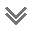

In [8]:
soup_ind = BeautifulSoup(reponse_ind.content, "html.parser")
soup_ind

In [9]:
soup_ind.title

<title>India Coronavirus: 27,977 Cases and 884 Deaths - Worldometer</title>

##Loading External Data

In [6]:
covid_19 = pd.read_csv(r'C:/Users/27703/Documents/Other/Corona/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')

In [7]:
covid_19

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,584,609,634,663,678,712,726,736,750,766
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,717,723,723,731,738,738,743,743,743
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,24,25,25,25,25,26,27,27,27
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,23,23,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,104,104,104,104,105,106,106,106,106,106
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,2963,2969,2971,2976,2982,2994,3002,3004,3016,3016


In [12]:
covid_19.groupby(covid_19['Province/State'])['4/29/20'].sum()

Province/State
Alberta                              5165
Anguilla                                3
Anhui                                 991
Aruba                                 100
Australian Capital Territory          106
Beijing                               593
Bermuda                               111
Bonaire, Sint Eustatius and Saba        5
British Columbia                     2087
British Virgin Islands                  6
Cayman Islands                         73
Channel Islands                       537
Chongqing                             579
Curacao                                16
Diamond Princess                        0
Falkland Islands (Malvinas)            13
Faroe Islands                         187
French Guiana                         125
French Polynesia                       58
Fujian                                355
Gansu                                 139
Gibraltar                             141
Grand Princess                         13
Greenland          